<a href="https://colab.research.google.com/github/imamfaisal21/DataScientist/blob/main/B62_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hierarchical -> Agglomerative

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x, _ = make_classification(n_samples = 1000,
                           n_features = 2, # 2 karena sumbu x dan sumbu y
                           n_informative = 2,
                           n_redundant = 0,
                           random_state = 2023)

In [ ]:
x

array([[ 1.63875805, -2.12994195],
       [-0.71783258,  0.59449997],
       [ 0.03019958, -1.08524113],
       ...,
       [-1.48657992, -0.17949376],
       [ 1.43403615,  0.81862226],
       [-0.15690578, -1.51684957]])

In [ ]:
# Membuat model cluster harus set jumlah cluster diawal
model = AgglomerativeClustering(n_clusters = 2)

#membuat prediksi menggunakan
yhat = model.fit_predict(x)


In [ ]:
# cluster unix
clusters = np.unique(yhat)
clusters

array([0, 1])

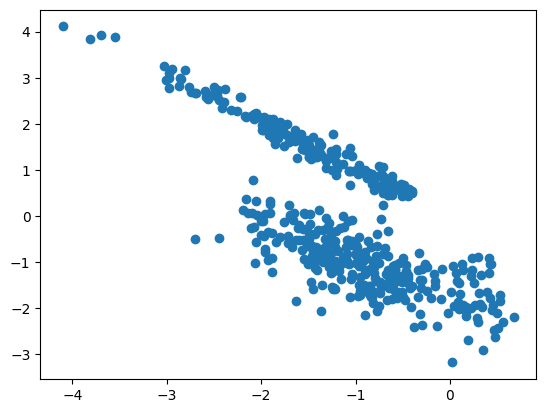

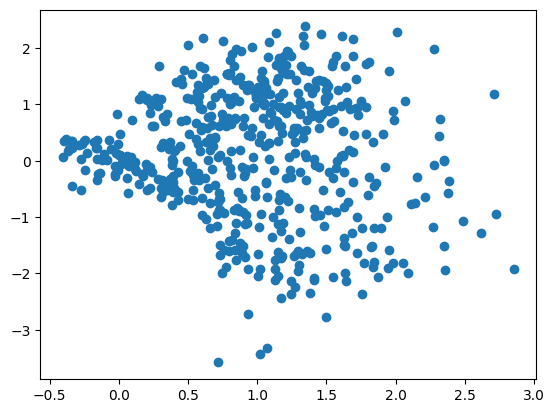

In [ ]:
# Creat Scatterplot untuk visualisasi data sampel yang sudah dicluster

for cluster in clusters:
  row_ix = np.where(yhat == cluster) # menampung data baris yang sesuai dengan clusternya
  plt.scatter(x[row_ix, 0], x[row_ix, 1])

  plt.show()

K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_KMeans, _ = make_classification(n_samples = 2000,
                                  n_features = 2,
                                  n_informative = 2,
                                  n_redundant = 0,
                                  random_state = 42)

In [ ]:
# Convert data X_Kmeans ke format numpy array

X_array = np.array(X_KMeans)


In [ ]:
# Membuat model KMeans set cluster diawal min 2 sama random state

model_kmeans = KMeans(n_clusters = 2,
                      random_state = 42)

model_kmeans.fit(X_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Mendapatkan centroid dari setiap cluster

centers = model_kmeans.cluster_centers_
centers

array([[-0.29136383,  1.22963079],
       [ 0.21932855, -0.94854205]])

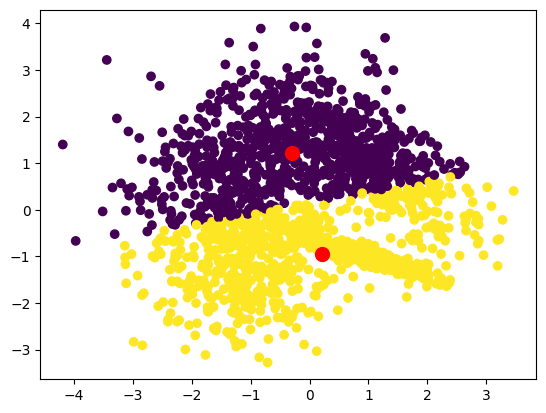

In [ ]:
output = plt.scatter(X_array[:, 0], #kolom sumbu x
                     X_array[:, 1], # kolom sumbu y
                     c = model_kmeans.labels_) # Warna untuk cluster berbeda

plt.scatter(centers[:, 0],
            centers[:, 1],
            c = "red",
            s = 100)

plt.show()

Clustering Cases in Wine Industry

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data = df[["Alcohol", "Color_Intensity"]]
data.sample(3)

,Alcohol,Color_Intensity
124,11.87,2.8
87,11.65,2.6
114,12.08,2.9


Hierarchical Clustering -> Agglomerative

In [ ]:
model = AgglomerativeClustering(n_clusters = 3)

pred_wine = model.fit_predict(data)

In [ ]:
# Mendapatkn cluster unik dari wine
clusters_wine = np.unique(pred_wine)

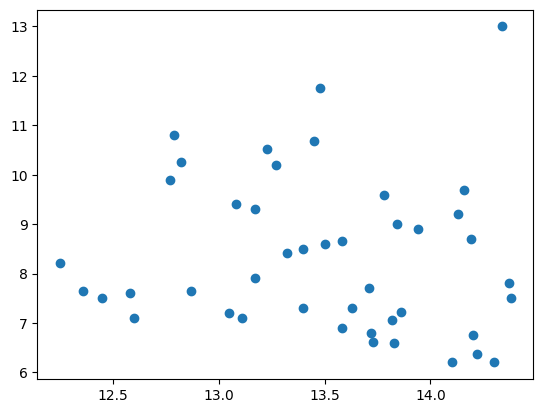

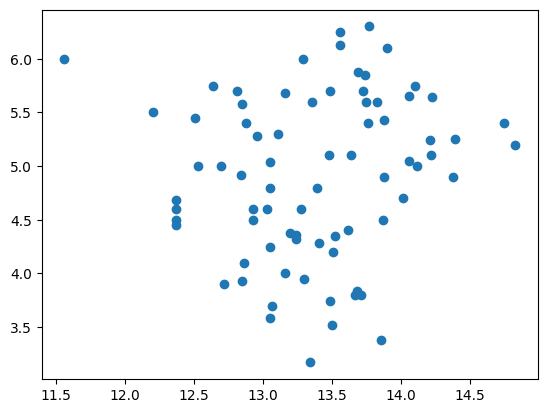

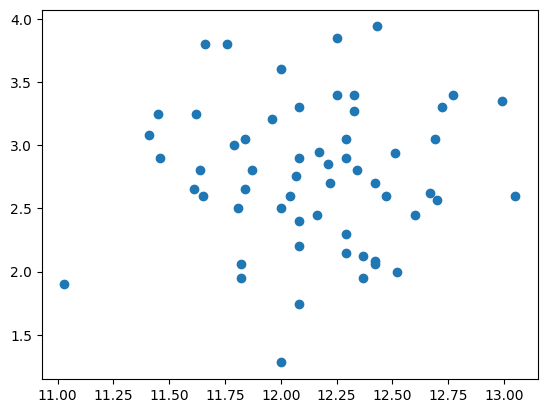

In [ ]:
dataframe_array = np.array(data)

for clus in clusters_wine :
  row = np.where(pred_wine == clus)

  plt.scatter(dataframe_array[row, 0], #kolom alcohol\
              dataframe_array[row, 1])

  plt.show()

K-Means

In [ ]:
model_kmeans_wine = KMeans(n_clusters =3,
                           random_state = 2023)

In [ ]:
pred_wine_kmeans = model_kmeans_wine.fit(dataframe_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pred_wine_kmeans

KMeans(n_clusters=3, random_state=2023)

In [ ]:
data["Cluster"] = pred_wine.astype(int)
data.head()

<ipython-input-22-c4aea0019af1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster"] = pred_wine.astype(int)


,Alcohol,Color_Intensity,Cluster
0,14.23,5.64,1
1,13.20,4.38,1
2,13.16,5.68,1
3,14.37,7.80,0
4,13.24,4.32,1


Elbow Method -> Menentukan Jumlah Cluster Optimal

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist # Untuk menghitung jarak dalam spatial

In [ ]:
distortions = []
inertias = []

for k in range(1, 10):
  #print (k)
  kmeanmodel = KMeans(n_clusters = k).fit(dataframe_array)
  nilai_distorsi = sum(np.min(cdist(dataframe_array,
                                    kmeanmodel.cluster_centers_,
                                    "euclidean"), axis = 1)) / dataframe_array.shape[0]
  inertia = kmeanmodel.inertia_
  distortions.append(nilai_distorsi)
  inertias.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

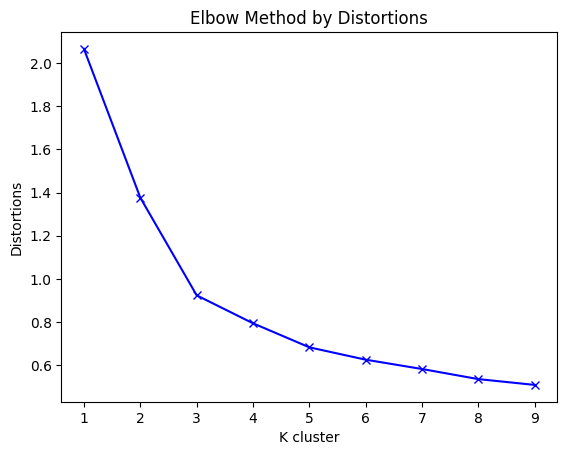

In [ ]:
# Visualisasi Elbow Method

plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel("K cluster")
plt.ylabel("Distortions")
plt.title("Elbow Method by Distortions")
plt.show()

Distance Calculation Example

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [ ]:
np.random.seed(2023)
num_samples = 1000
num_features = 2
data = np.random.rand(num_samples, num_features)

In [ ]:
num_clusters = 2

In [ ]:
model = KMeans(n_clusters = num_clusters,
                random_state = 2023)

In [ ]:
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=2023)

In [ ]:
distances = pairwise_distances(data,
                             model.cluster_centers_,
                             'euclidean') #Manhattan

In [ ]:
for i in range(100):
  print("Data Point {}: cluster {}, distances to centroid: {}" \
  .format(i+1, model.labels_[i], round(distances[i, model.labels_[i]], 3)))

Data Point 1: cluster 1, distances to centroid: 0.384
Data Point 2: cluster 0, distances to centroid: 0.414
Data Point 3: cluster 1, distances to centroid: 0.108
Data Point 4: cluster 1, distances to centroid: 0.302
Data Point 5: cluster 0, distances to centroid: 0.212
Data Point 6: cluster 1, distances to centroid: 0.219
Data Point 7: cluster 1, distances to centroid: 0.397
Data Point 8: cluster 1, distances to centroid: 0.375
Data Point 9: cluster 1, distances to centroid: 0.35
Data Point 10: cluster 1, distances to centroid: 0.504
Data Point 11: cluster 0, distances to centroid: 0.353
Data Point 12: cluster 1, distances to centroid: 0.162
Data Point 13: cluster 1, distances to centroid: 0.416
Data Point 14: cluster 1, distances to centroid: 0.387
Data Point 15: cluster 1, distances to centroid: 0.438
Data Point 16: cluster 0, distances to centroid: 0.259
Data Point 17: cluster 0, distances to centroid: 0.31
Data Point 18: cluster 0, distances to centroid: 0.473
Data Point 19: cluste